# 육아휴직 정책 PDF → RAG 데이터 실험 notebook

## pytesseract 라이브러리

### 환경 설정

In [2]:
import os
import fitz
import cv2
import matplotlib.pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

### pytesseract 이미지 추출 및 OCR 실험

In [3]:
PDF_FILE = "../data/정책브리핑_250430.pdf"
# PDF_FILE = "../data/정책브리핑_250513.pdf"

In [4]:
doc = fitz.open(PDF_FILE)

### get_page_images + pytesseract OCR

In [5]:
doc.page_count

2

In [17]:
doc.get_page_images(0)

[(4, 0, 110, 43, 8, 'ICCBased', '', 'X4', 'FlateDecode'),
 (72, 0, 890, 327, 8, 'ICCBased', '', 'X72', 'FlateDecode'),
 (73, 0, 583, 312, 8, 'ICCBased', '', 'X73', 'FlateDecode')]

In [21]:
doc.get_page_text(0)

'기사인쇄하기\n[K-희망사다리] 부모 함께 육아휴직제\n▲ 지원대상\n· 생후 18개월 이내 자녀가 있고 부모 모두가 육아휴직을 사용하는 경우\n· 「고용보험법」상 고용보험 피보험단위기간 180일 이상 충족 필요\n※ 공무원이나 사립학교 교원은 대상 아님\n▲ 지원내용\n· 육아휴직 첫 6개월에 대해 육아휴직급여를 통상임금의 100% 지원\n2025.04.30\n문화체육관광부 국민소통실\n25. 5. 13. 오후 4:38\n정책브리핑 | 기사인쇄하기\nhttps://www.korea.kr/common/searchPrint.do\n1/2\n'

In [6]:
for page in range(doc.page_count):
    for img in doc.get_page_images(page):
        # 무조건 첫 번째 이미지는 "대한민국 정책 브리핑" 로고이므로 제외.
        xref = img[0] # 이미지의 내부 cross-reference 값
        base_image = doc.extract_image(xref)
        image_bytes = base_image["image"]
        img_ext = base_image["ext"]  # png, jpeg 등
        
        # 이미지 저장
        with open(f"image_{xref}.{img_ext}", "wb") as f:
            f.write(image_bytes)

        # 이미지로 pytesseract OCR
        from PIL import Image
        from io import BytesIO
        img = Image.open(BytesIO(image_bytes))
        img.show()
        text = pytesseract.image_to_string(img, lang="kor")
        print(f"[Image {xref}] OCR result:\n{text}\n")


[Image 4] OCR result:


[Image 72] OCR result:
『40.2

함께하는
순간
더커지는
행복

: 가족-여성

생애주기별 국민생활 서비스

모 함께 육아휴직제

생후 18개월 이내 자녀가 있다면 부모가 함께 육아를 해요.

 고용노동부 고객상담센터
1350



[Image 73] OCR result:
육아휴직기간(부모공통)        지급 상한액              지급기준

# 6개월+옷 6개월             각각월 450만원 | 동상임의 100%
# 매월 + 옷 5개월 .  |각각월400만원
#4개월+%4개월 | 각각월350만원
#3개월+%3가월 . | 각각월300만원 ㆍ
팔2개월+ 2개월 . ㅣ 각각월250만원

롤1개월+1개월 . | 각각월 250만원





### get_page_pixmap + pytesseract OCR

In [7]:
doc.get_page_pixmap(0).save("page_0.png")

In [8]:
os.path.isfile("page_0.png")


True

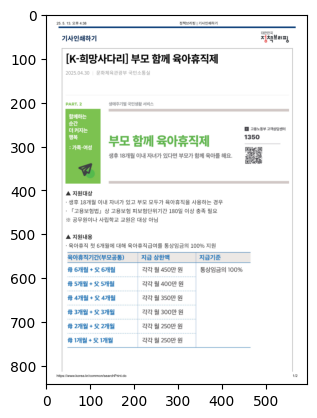

In [9]:
image = cv2.imread("page_0.png")
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.show()


In [10]:
text = pytesseract.image_to_string(rgb_image, lang="kor")
print(text)


그 오514.                                                     벼리 | 71서기

기사인쇄하기                                                     저책브미핑

[<희망사다리] 부모 함께 육아휴직제

생매주기별 국민생활 서비스

부모함께육아류직제 "5

생후 18개월 이내 자녀가 있다면 부모가 함께 육아를 해요.

소 지원대상

- 생후 18개월 이내 자녀가 있고 부모 모두가 육아휴직을 사용하는 경우
- 「고용보혐법」 상 고용보험 피보험단위기간 180일 이상 충족 필요
 공무원이나 사립학교 교원은 대상 아님

소 지원내용

ㆍ 육아휴직 첫 6개월에 대해 육아휴직급여를 통상임금의 1009%지원

육아휴직기간(부모공통)      지급 상한액          지급기준

총 6개월 +《 6개월            각각 월 450만원        통상임금의 100%
총 5개월 + 5개월     각각월 400만원

. 4개월 + 4개월 각각월 350만원

. 3개월 +*% 3개월     | 각각월 300만원

총 2개월 + % 2개월     | 각가월250만원

. 1개월 + 1개월      | 각가월250만원

개0어야02체000902다시.




## EasyOCR 라이브러리

In [11]:
import easyocr

In [12]:
reader = easyocr.Reader(["ko", "en"])
results = reader.readtext('image_30.jpeg')
results

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\Sangjin\AppData\Local\pypoetry\Cache\virtualenvs\rag-chatbot-fMiVejxw-py3.12\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[([[np.int32(260), np.int32(22)],
   [np.int32(360), np.int32(22)],
   [np.int32(360), np.int32(52)],
   [np.int32(260), np.int32(52)]],
  '고용노동부',
  np.float64(0.9969372570687219)),
 ([[np.int32(64), np.int32(81)],
   [np.int32(494), np.int32(81)],
   [np.int32(494), np.int32(144)],
   [np.int32(64), np.int32(144)]],
  '출산움이 고용안정 지원',
  np.float64(0.4142239533223553)),
 ([[np.int32(79), np.int32(199)],
   [np.int32(221), np.int32(199)],
   [np.int32(221), np.int32(219)],
   [np.int32(79), np.int32(219)]],
  '육아루직슬 준 사업주도',
  np.float64(0.12859018418491378)),
 ([[np.int32(75), np.int32(219)],
   [np.int32(227), np.int32(219)],
   [np.int32(227), np.int32(239)],
   [np.int32(75), np.int32(239)]],
  '지원S받3수있다고요?',
  np.float64(0.23333392006323714)),
 ([[np.int32(433), np.int32(233)],
   [np.int32(473), np.int32(233)],
   [np.int32(473), np.int32(253)],
   [np.int32(433), np.int32(253)]],
  'VYESI',
  np.float64(0.2661500835099899)),
 ([[np.int32(352), np.int32(474)],
   [np.int32(448), n

: 

## pororo 라이브러리

https://github.com/kakaobrain/pororo

pororo 라이브러리는 2022년에 아카이빙 되었고, torch version이 1.6이어야 함.

따라서, 현재 버전의 torch를 사용하려면 1.6 버전으로 다운그레이드 해야 함.

한국어 성능이 좋다고는 알려졌는데, 일단 후순위로 미뤄두고 싶음..



In [9]:
import torch
import torchvision
import cv2

In [19]:
from pororo import Pororo

ModuleNotFoundError: No module named 'pororo'

## Upstage Document Parse 

https://www.upstage.ai/products/document-parse?v=1


아래와 같은 방식으로 사용할 수 있음.

따라서, 위 `fitz(PyMuPDF)` 라이브러리를 이용하여
- 텍스트는 PyMuPDF의 `.get_page_text()` 메서드를 활용하여 추출할 수 있음.
- 이미지만 `UpstageDocumentParseLoader` 라이브러리를 활용하여 추출.

또는, 굳이 분리하지 않고 PDF 파일 자체를 호출해도 되지 않을까..?

but, 문제가 될 만한 요소
1. 가격(Pay-as-you-go)
   - Document Parse(Convert complex documents to LLM-readable formats): $0.01/page
   - Document OCR(Extract all text from any document): $0.0015/page 
2. LLM 방식은 선호하지 않았다고 생각했음.

In [ ]:
from langchain_upstage import UpstageDocumentParseLoader
loader = UpstageDocumentParseLoader("file_path", ocr="force")